## Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los `csv` se encuentra en la carpeta `dump`.
* Cada `csv` tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción.
* Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.
## Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos `numpy`, `pandas`, `matplotlib`, `seaborn`, `glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta `dump`.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en `dump` utilizando `glob.glob` y `os.getcwd()` para extraer las rutas absolutas. Posteriormente genere un objeto `pd.DataFrame` que contenga todos los csv.
* Asegúrese de eliminar la columna `Unnamed: 0` que se genera por defecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

In [2]:
dire = os.getcwd()
track_list = glob.glob(dire+'/dump/*.csv')

In [3]:
df_append = []

for file in track_list:
    df_tmp = pd.read_csv(file).drop(columns='Unnamed: 0')
    df_append.append(df_tmp)
df = pd.concat(df_append)
df.columns = ['artist', 'genre', 'title', 'lyrics']
df.sample(3)

artist genre             title  \
136         Rush  rock  Summertime Blues   
118    The Doors  rock             Awake   
153  Nicki Minaj   pop    Broken Silence   

                                                lyrics  
136  Well I'm gonna raise a fuss, yes, I'm gonna ra...  
118  Unfortunately, we are not licensed to display ...  
153  This a celebration, this is levitation \n Look...

In [4]:
df.shape

(9489, 4)

## Ejercicio 2: Matriz de ocurrencias
* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`.
* Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
* Con la clase inicializada, incorpore las letras con el método `fit_transform` y guarde los resultados en un nuevo objeto.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer 

In [6]:
count_vectorizer=CountVectorizer(stop_words='english', max_features=5000)
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyrics'])

## Ejercicio 3: Entrenamiento del Modelo

* Importe `sklearn.decomposition.LatentDirichletAllocation` y `sklearn.model_selection.GridSearchCV`.
* Genere una búsqueda de grilla con los siguientes hiperparámetros:
- `n_components: [5, 10, 15]`.
- `learning_decay: [0.7, 0.5]`.
* Entrene la búsqueda de grilla con las letras en un formato vectorizado con `CountVectorizer`.
* Reporte brevemente cuál es la mejor combinación de hiperparámetros.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [8]:
n_components = [5, 10, 15]
learning_decay  = [.7, .5]
params = {'n_components':n_components, 'learning_decay':learning_decay}

In [9]:
LDA = LatentDirichletAllocation(random_state=16254)
model = GridSearchCV(LDA, param_grid=params, n_jobs=-1) 

In [10]:
model.fit(count_vectorizer_fit) 

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=16254,
                                                 topic_word_prior=None,
                                                 tot

In [11]:
model.best_params_

{'learning_decay': 0.7, 'n_components': 5}

In [12]:
model.best_estimator_

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=16254,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

Podemos observar que la mejor combinación es la siguiente:

**{'learning_decay': 0.7, 'n_components': 5}**

## Ejercicio 4 : Inferencia e Identificación de Tópicos

* En base a la mejor combinación de hiperparámetros, entrene el modelo con la matriz de atributos de las letras.
* Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:

```python
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico
for topic_id, topic_name in enumerate(fit_best_lda.components_):
# para cada tópico
    print(\"tópico: {}\".format(topic_id + 1))
# mediante argsort logramos ordenar los elementos por magnitud
# para los elementos más relevantes ordenados por argsort, buscamos su correlativo
# en la matriz dispersa y devolvemos el nombre.
# finalmente concatenamos las palabras\n",
    print(\" \".join([counter.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))
```
* Comente a qué tópicos está asociada cada clase inferida.


In [13]:
model2 = LatentDirichletAllocation(random_state=16254, n_components=5, learning_decay=.7) 

In [14]:
model2.fit(count_vectorizer_fit) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=16254,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [15]:
for topic_id, topic_name in enumerate(model2.components_):
    print("tópico: {}".format(topic_id + 1))
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]])) 

tópico: 1
just got know don like ll ve cause gonna said night time think come good
tópico: 2
life ll time away world eyes god die death ve la heart blood day light
tópico: 3
like shit got fuck nigga yo don ain know man niggas ya bitch em yeah
tópico: 4
love yeah don oh know baby want let wanna just come say ooh make gonna
tópico: 5
like got don cause just know ain man black em say people rock ah come


In [16]:
for topic_id, topic_name in enumerate(model.best_estimator_.components_):
    print("tópico: {}".format(topic_id + 1))
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]])) 

tópico: 1
just got know don like ll ve cause gonna said night time think come good
tópico: 2
life ll time away world eyes god die death ve la heart blood day light
tópico: 3
like shit got fuck nigga yo don ain know man niggas ya bitch em yeah
tópico: 4
love yeah don oh know baby want let wanna just come say ooh make gonna
tópico: 5
like got don cause just know ain man black em say people rock ah come


In [17]:
df['genre'].unique() 

array(['hiphop', 'metal', 'pop', 'rock'], dtype=object)

Asi se relacionan las clases:

hiphop: tópico 3

metal: tópico 2

pop: tópico 4

rock: tópico 1 y 5

## Ejercicio 5: Identificación de probabilidades
* En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
* Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. Podemos implementar esto de la siguiente manera:

```python

# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(transformed_feats)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
    # pasamos esta matriz y la redondeamos en 3 decimales
    np.round(fit_best_lda, 3),
    # agregamos un índice
    index=df_lyrics.index
)
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=1)

# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(docs_topics.values, axis=1) + 1
```

* Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.

* Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.

* Grafique la distribución de las probabilidades para algún artista en específico.



In [18]:
fit_best_lda = model2.transform(count_vectorizer_fit)
topics_for_each_doc = pd.DataFrame(
                                   np.round(fit_best_lda, 3),
                                   index=df['lyrics'].index
                                   )
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, model2.n_components + 1)))
concatenated_df = pd.concat([df[['artist', 'genre', 'title']], topics_for_each_doc], axis=1)
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1

In [19]:
concatenated_df.head() 

artist   genre                   title   T: 1   T: 2   T: 3   T: 4  \
0  Public Enemy  hiphop  You're Gonna Get Yours  0.408  0.001  0.001  0.001   
1  Public Enemy  hiphop     Sophisticated Bitch  0.406  0.001  0.265  0.001   
2  Public Enemy  hiphop      Miuzi Weighs A Ton  0.082  0.001  0.001  0.001   
3  Public Enemy  hiphop                Timebomb  0.105  0.010  0.032  0.043   
4  Public Enemy  hiphop          Too Much Posse  0.207  0.090  0.393  0.002   

    T: 5  highest_topic  
0  0.590              5  
1  0.328              1  
2  0.916              5  
3  0.810              5  
4  0.308              3

In [20]:
concatenated_df.columns 

Index(['artist', 'genre', 'title', 'T: 1', 'T: 2', 'T: 3', 'T: 4', 'T: 5',
       'highest_topic'],
      dtype='object')

In [21]:
concatenated_df.groupby(['genre','highest_topic']).size() 

genre   highest_topic
hiphop  1                 285
        2                  81
        3                1396
        4                 122
        5                 651
metal   1                 106
        2                1329
        3                  20
        4                  91
        5                  36
pop     1                 262
        2                 160
        3                 209
        4                 540
        5                  61
rock    1                1303
        2                1346
        3                  67
        4                1238
        5                 186
dtype: int64

Podemos ver la tendencia de cada tópico. 

hiphop: La tendencia se asocia al tópico 3.
    
metal: La tendencia se asocia al tópico 2.
        
pop: Acá la tendencia no es tan marcada pero se puede asociar al tópico 4.
            
rock: Acá tampoco la tendencia es tan marcada, incluso tres tópicos se pueden asociar: topicos 1, 2 y 4.

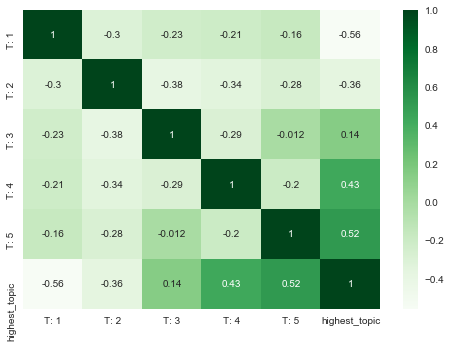

In [22]:
sns.heatmap(concatenated_df.corr(), cmap='Greens', annot=True) ;

Se ve que los topicos no se relacionan fuertemente entre si

In [23]:
concatenated_df['artist'].value_counts() 

Eminem               493
Bruce Springsteen    467
Bob Dylan            447
Britney Spears       323
Nicki Minaj          282
                    ... 
Dua Lipa              29
Lorde                 27
Black Star            23
Gorgoroth             16
Necrophagist          16
Name: artist, Length: 61, dtype: int64

In [24]:
def topic_view(df, artist):
    df_tmp = df[df['artist'] == artist].loc[:,'T: 1':'T: 5']
    plt.figure(figsize=(14,4))
    for i, t in enumerate(df_tmp.columns):
        plt.subplot(1,5,i+1)
        sns.distplot(df_tmp[t])
    plt.suptitle(artist)
    plt.tight_layout()
    plt.show()

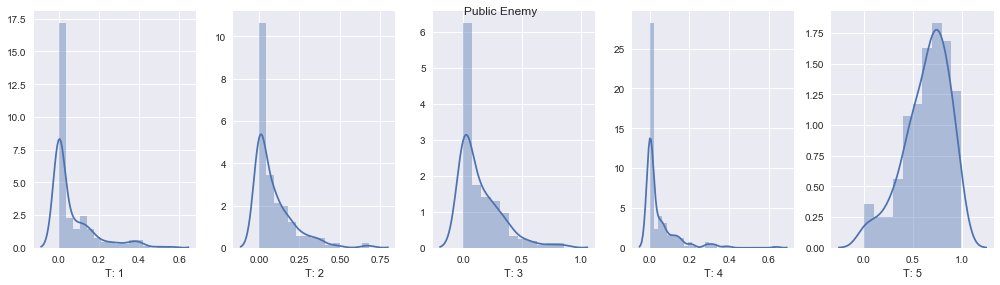

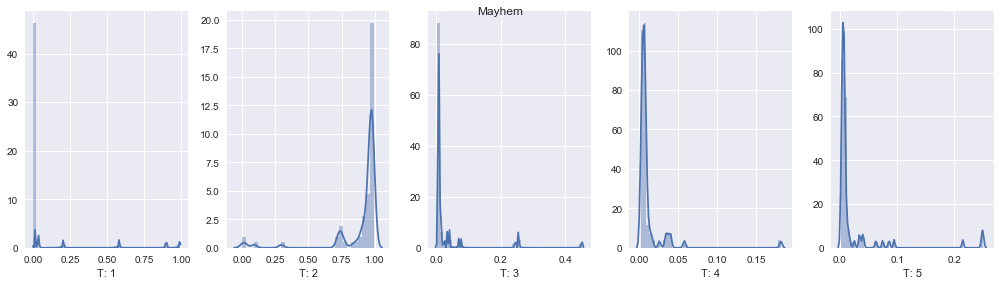

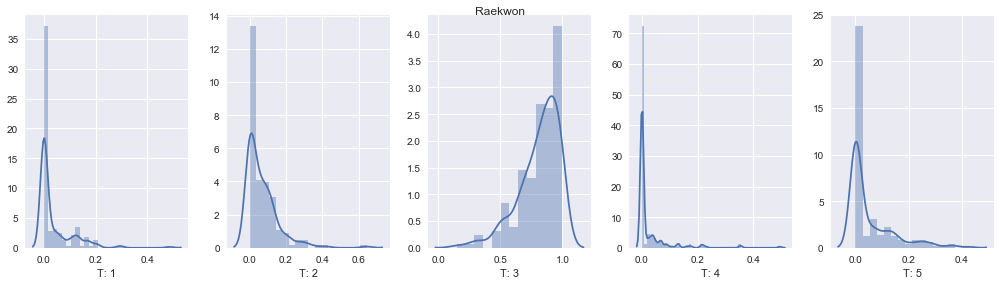

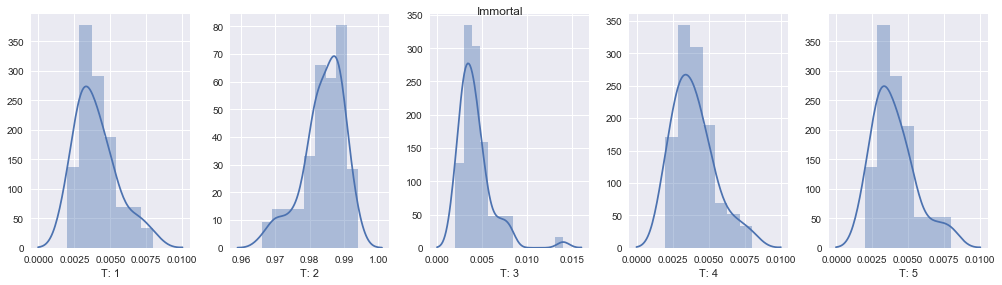

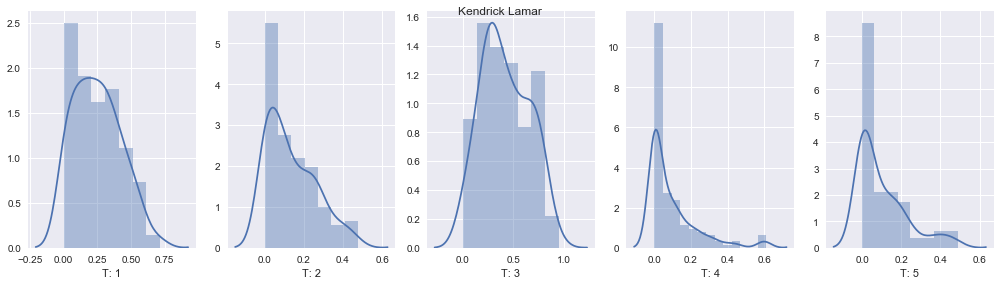

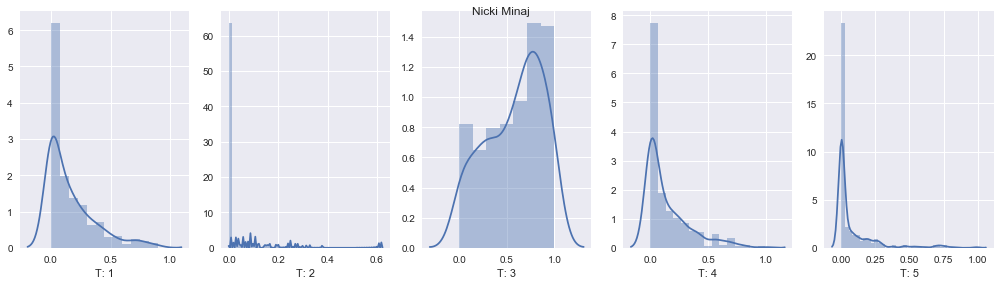

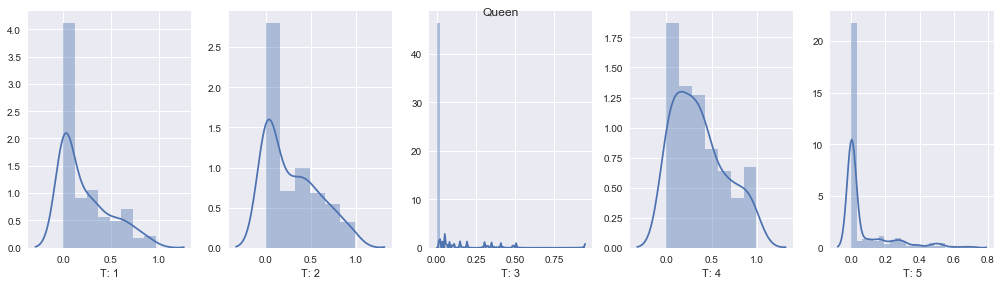

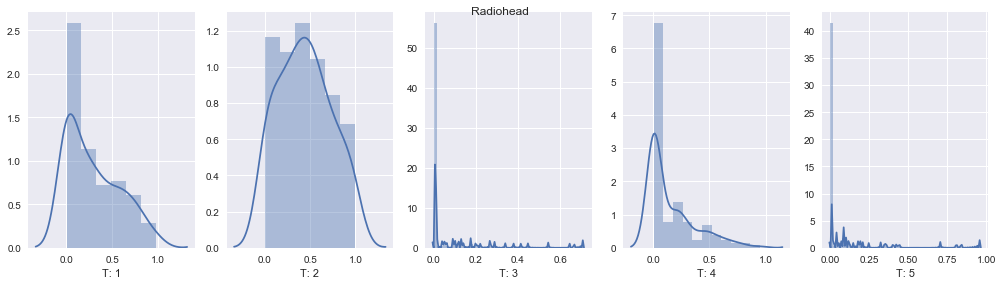

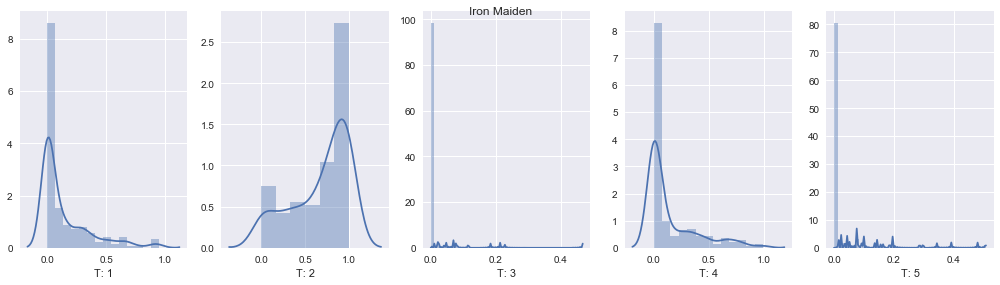

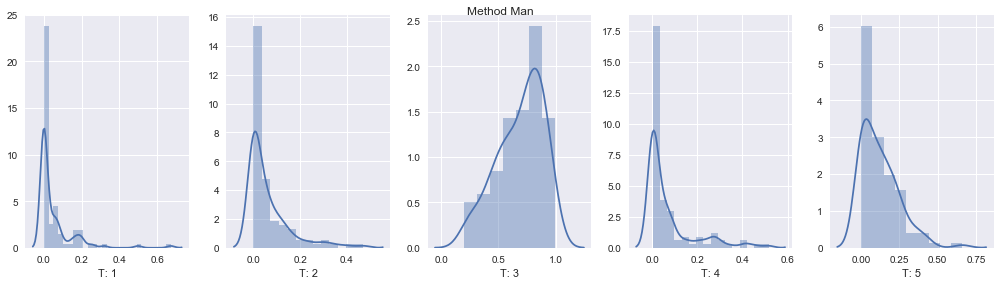

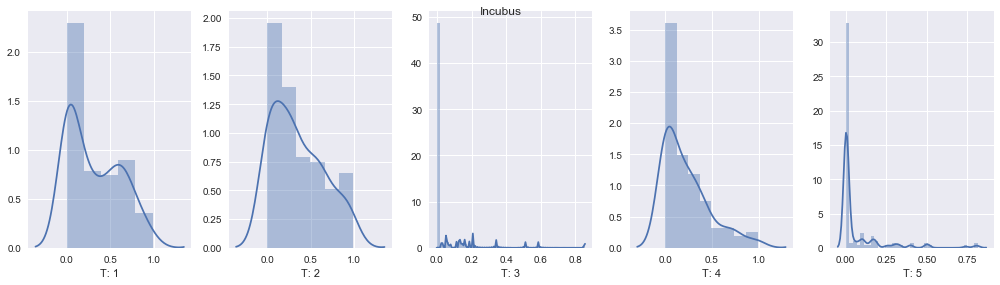

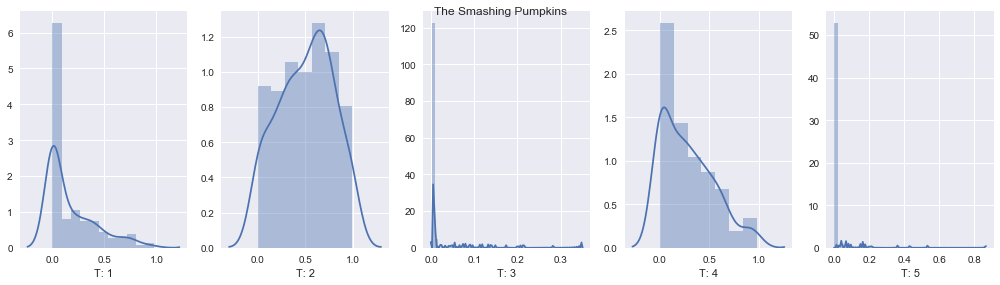

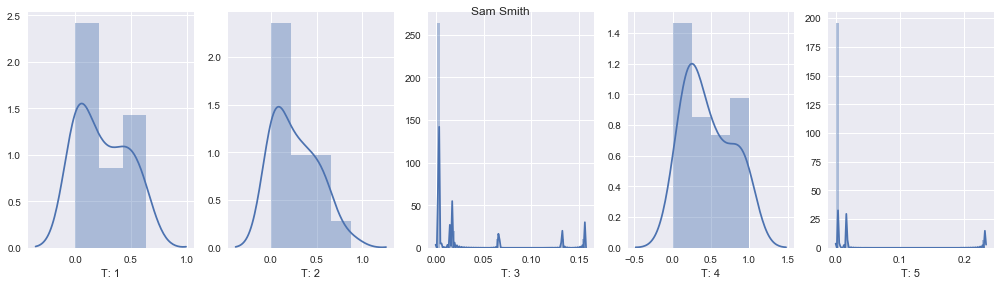

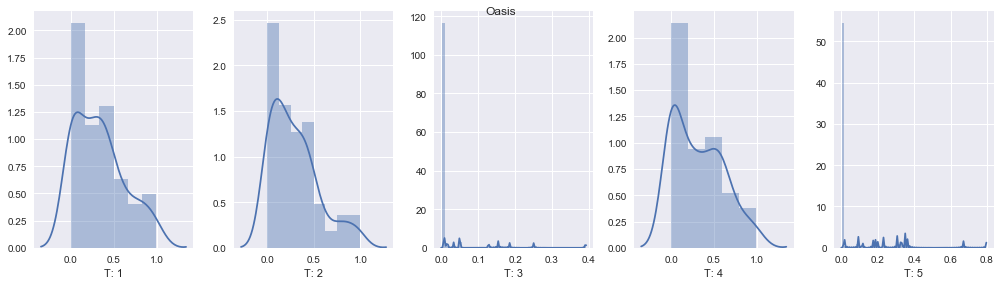

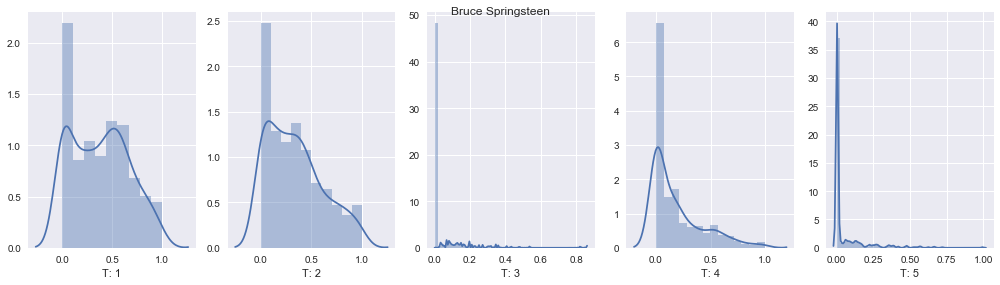

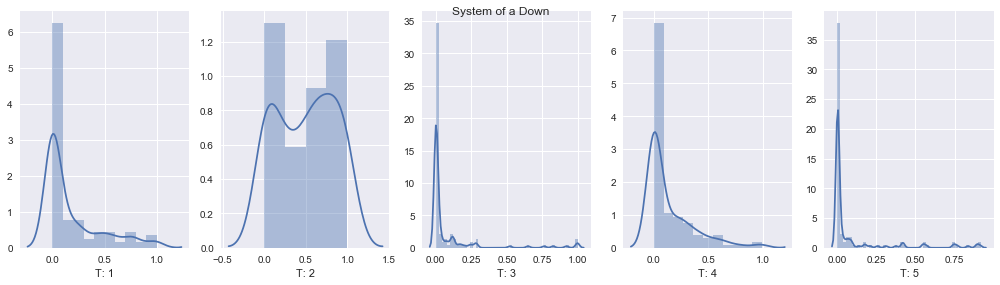

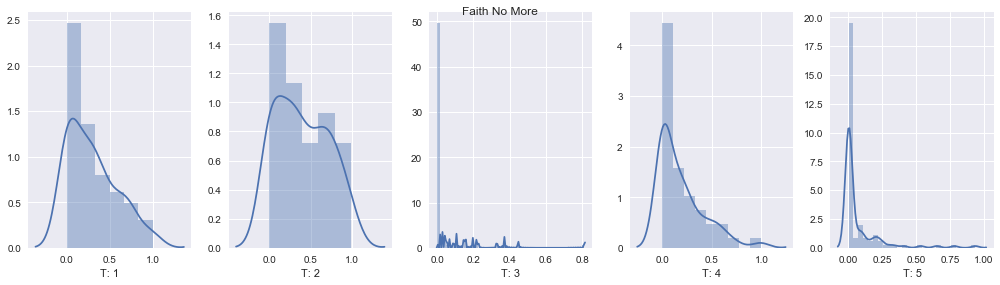

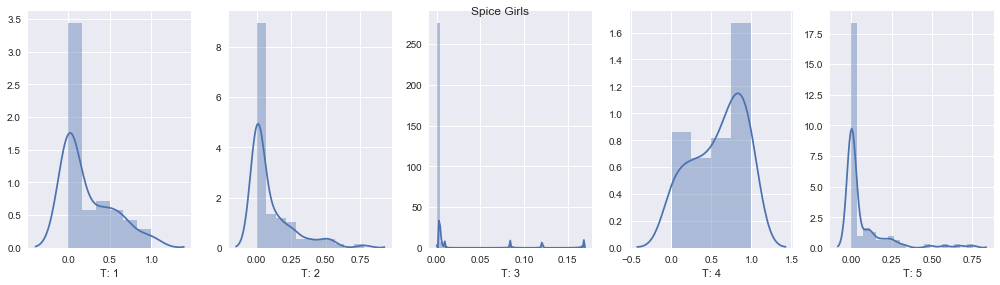

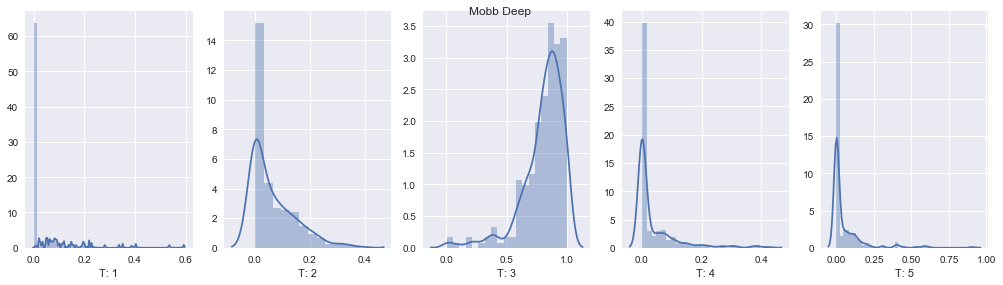

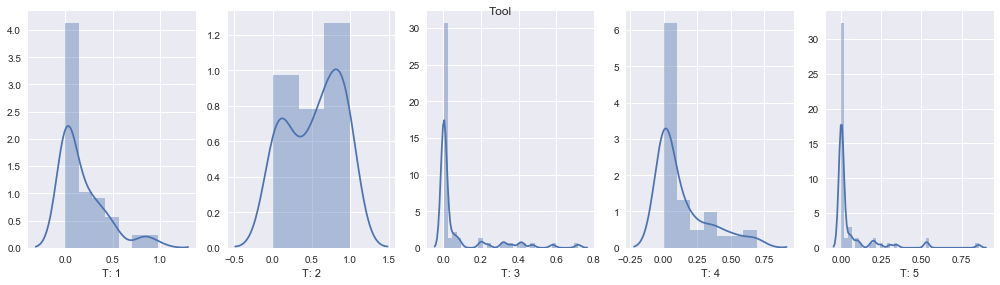

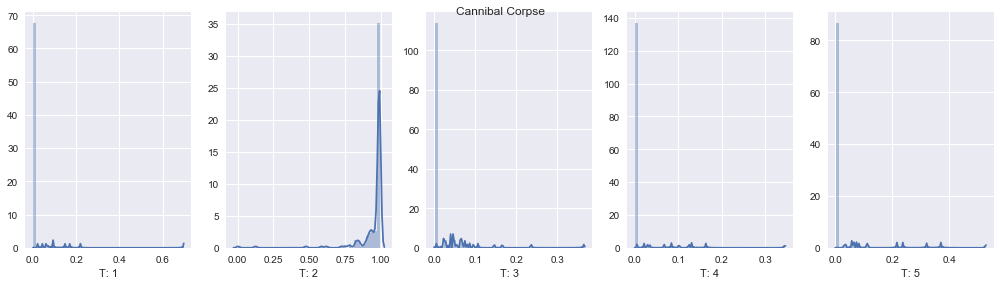

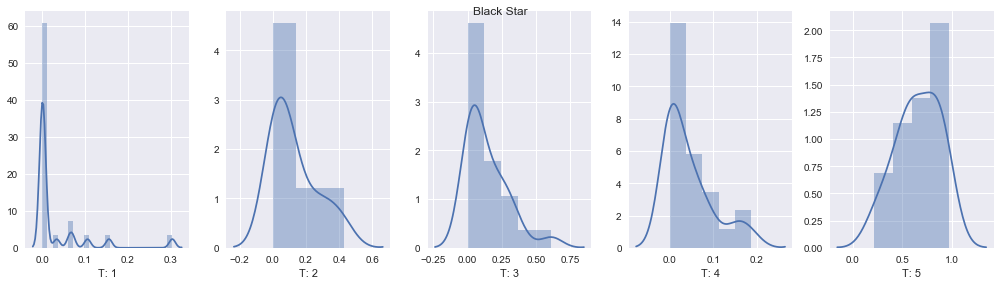

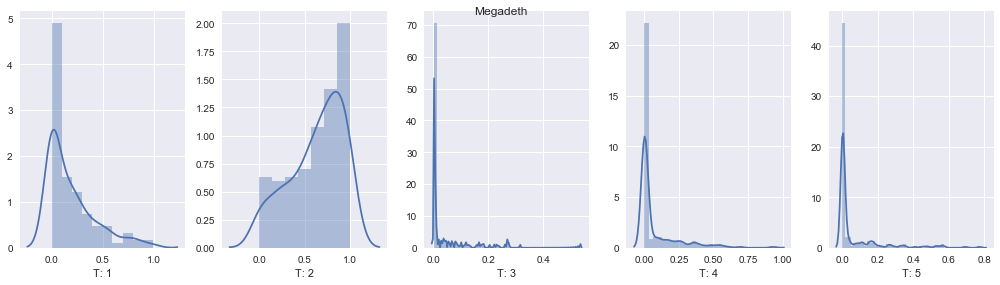

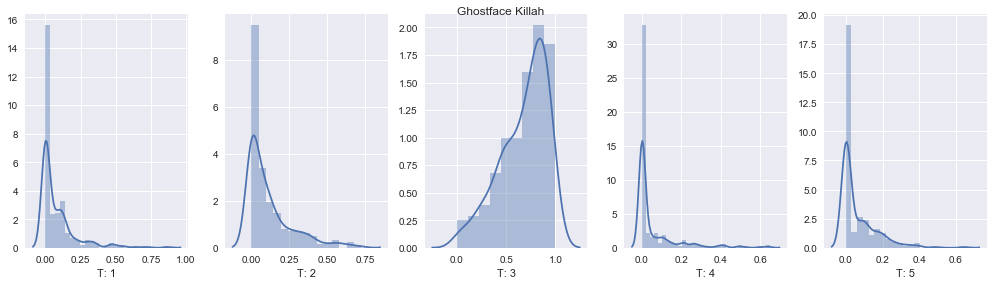

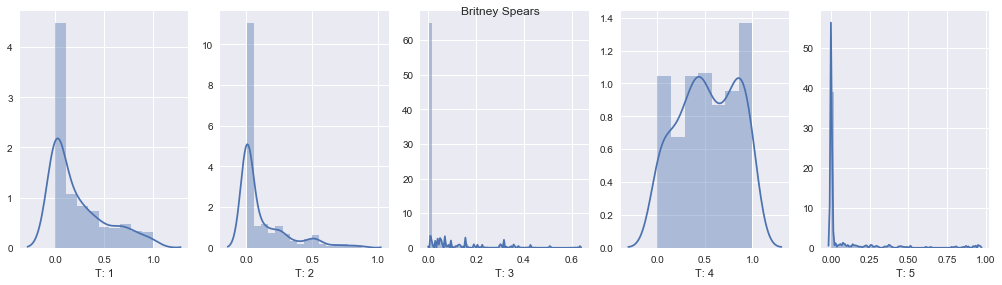

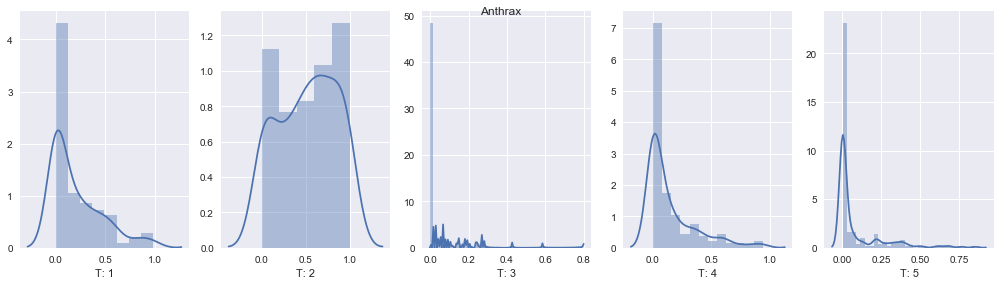

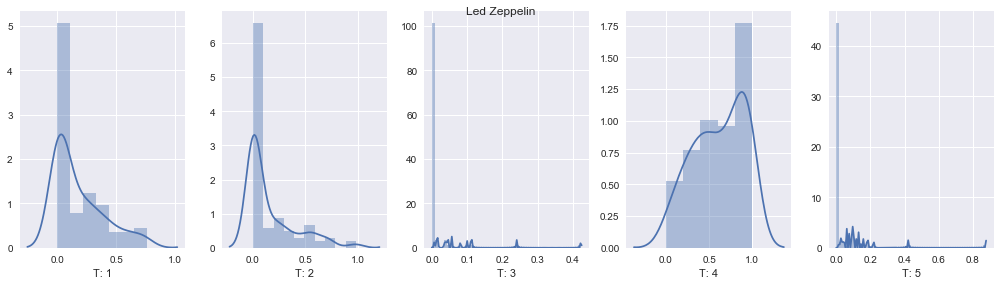

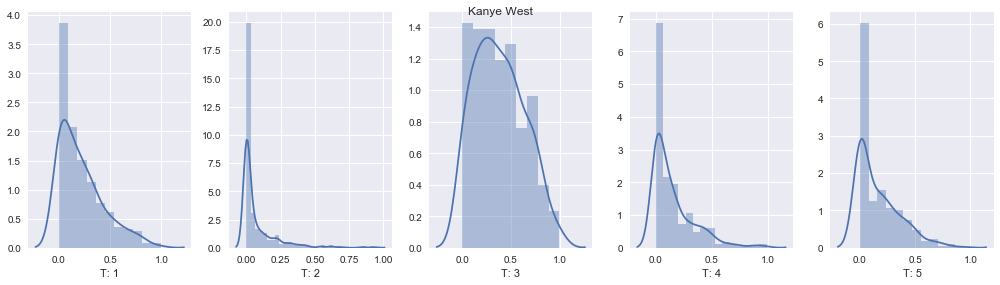

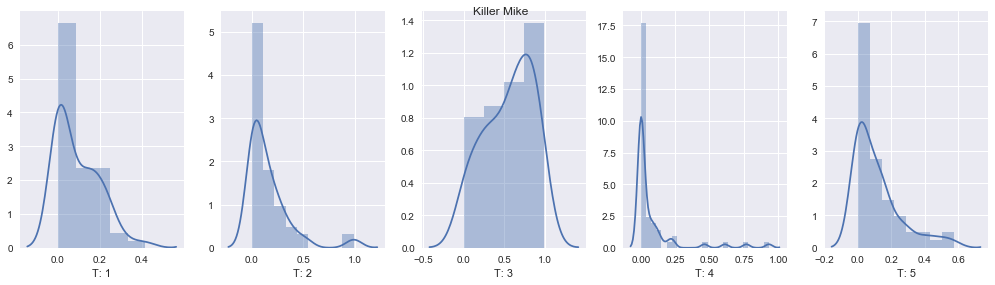

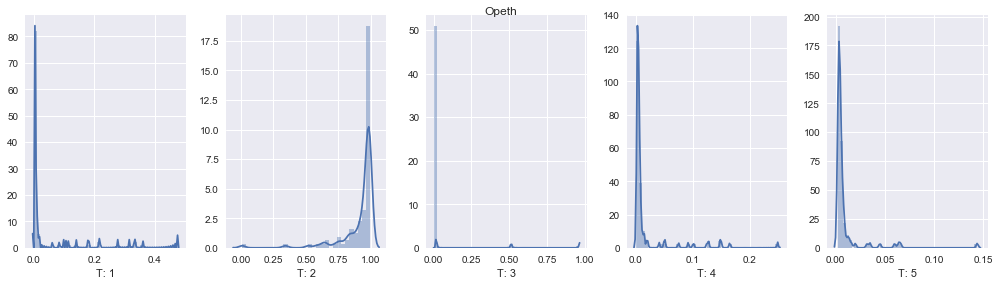

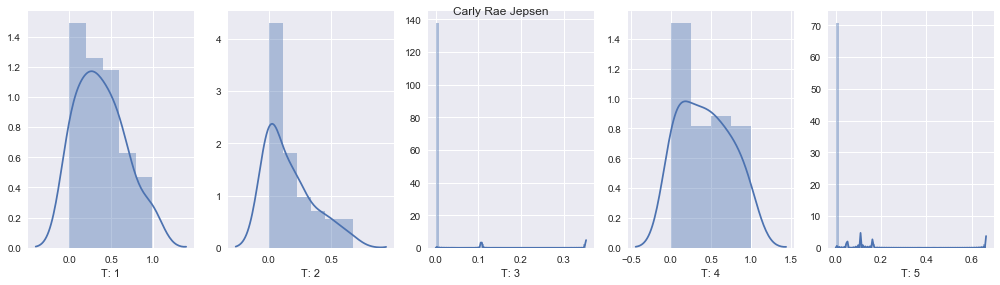

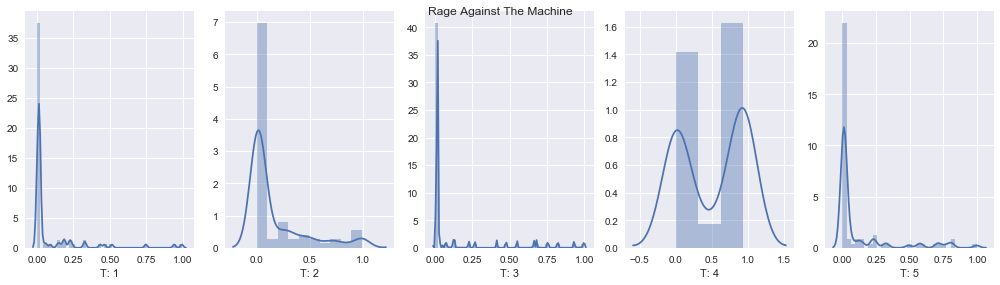

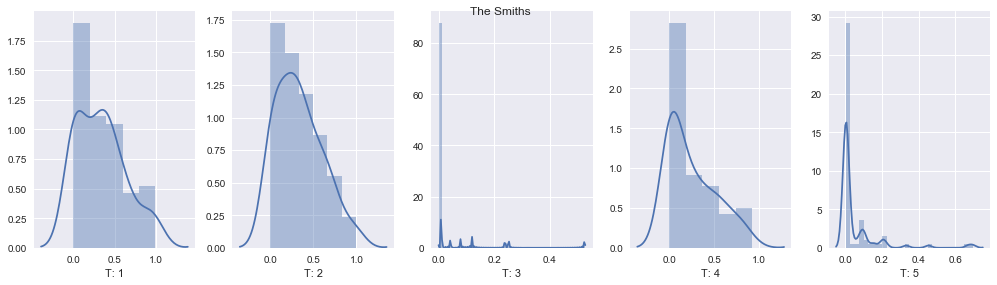

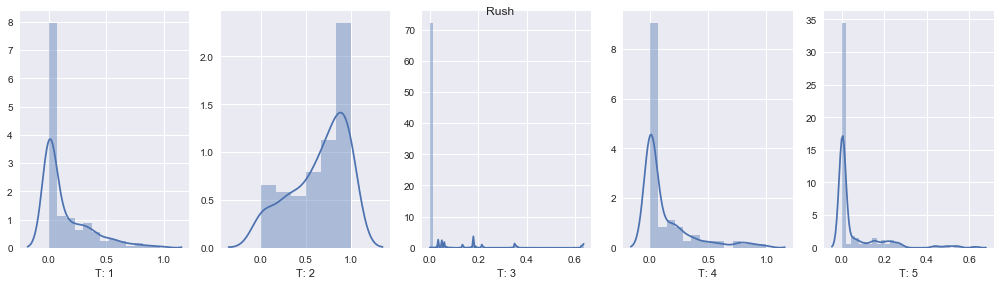

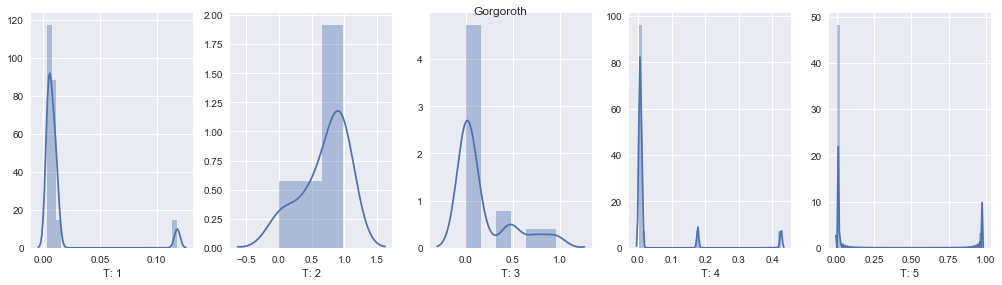

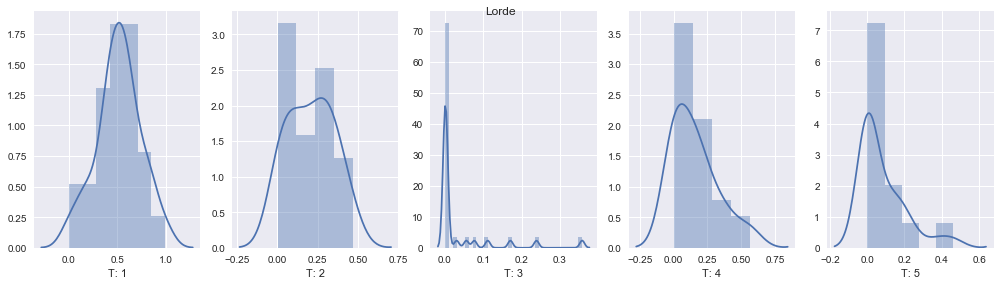

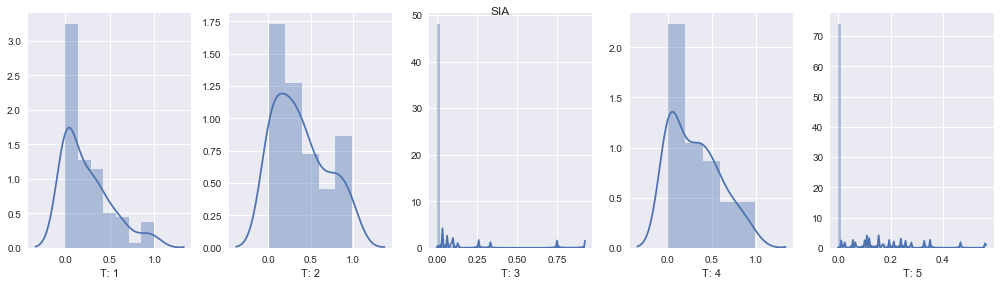

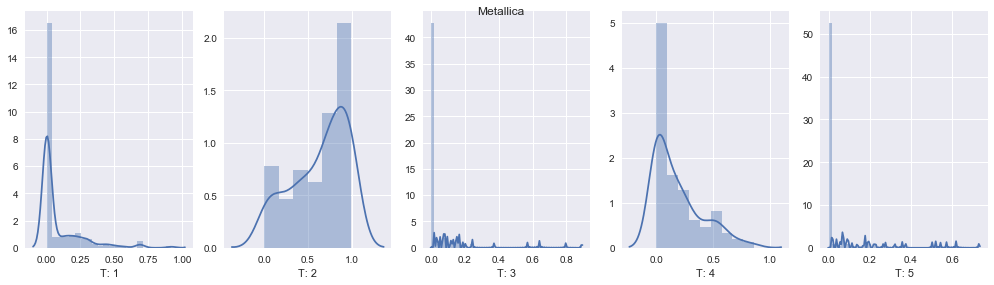

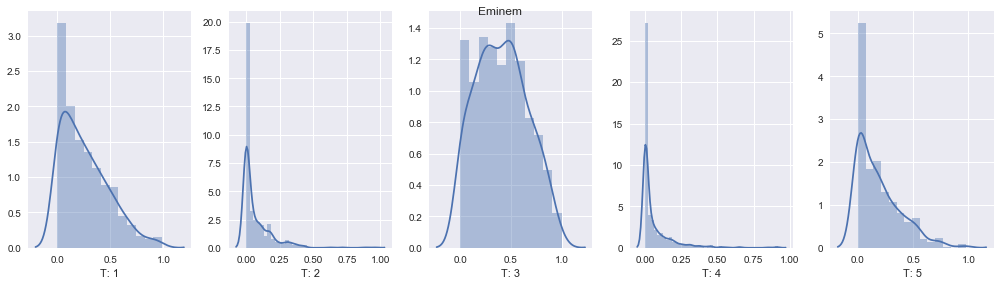

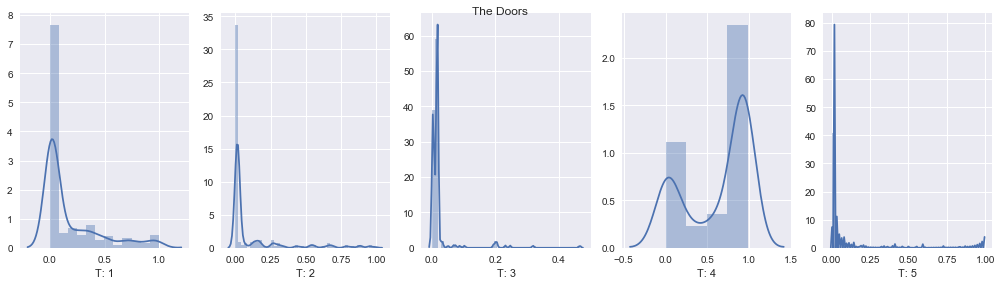

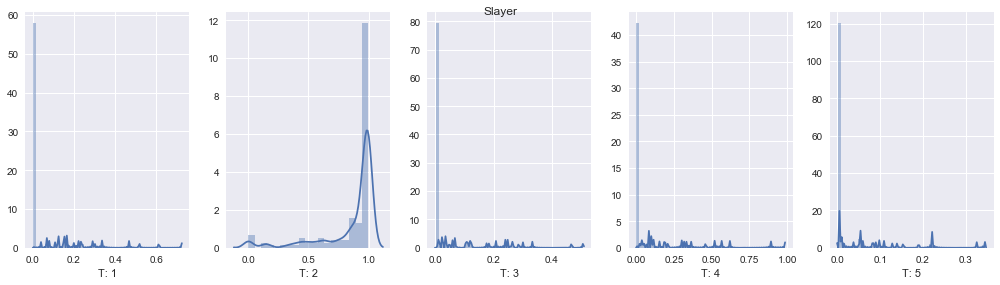

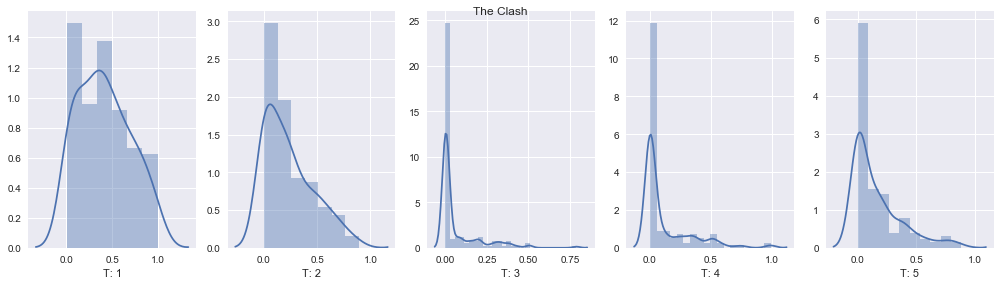

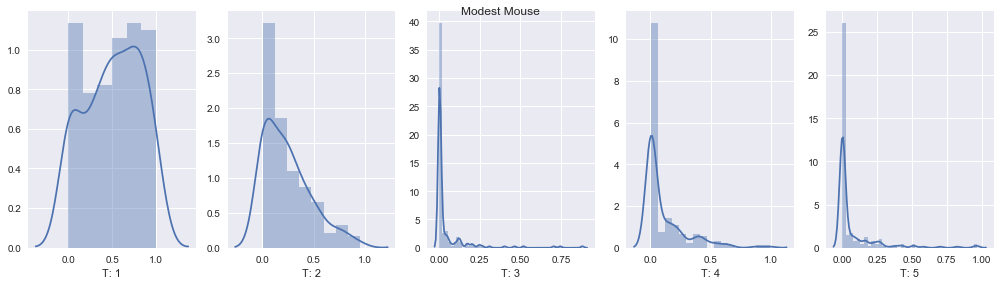

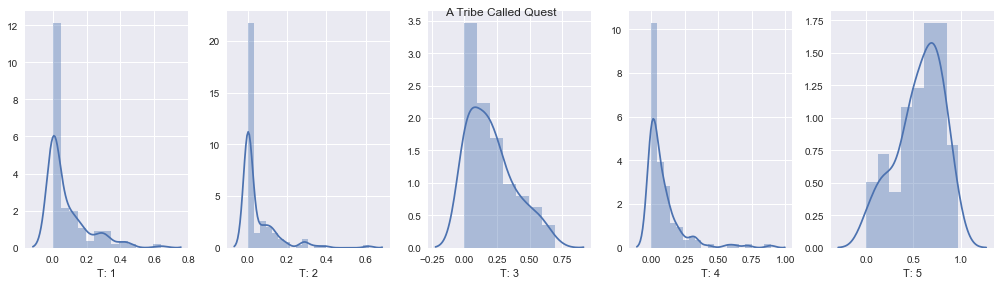

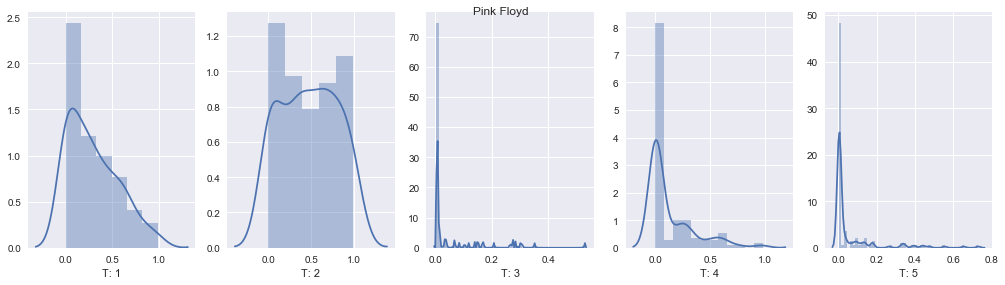

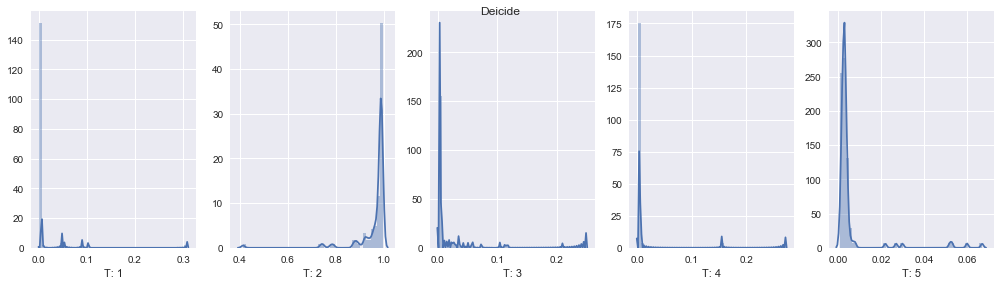

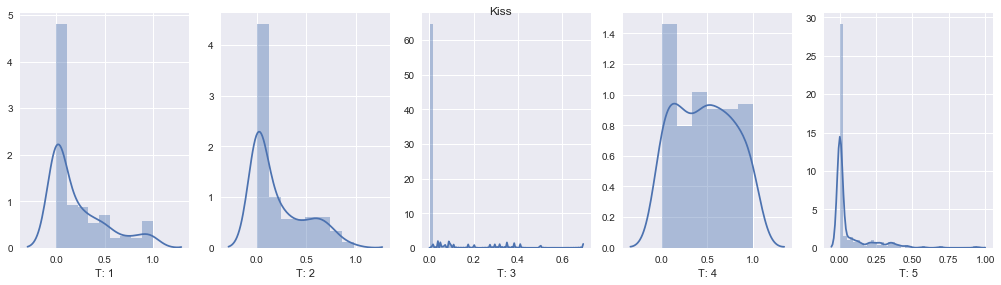

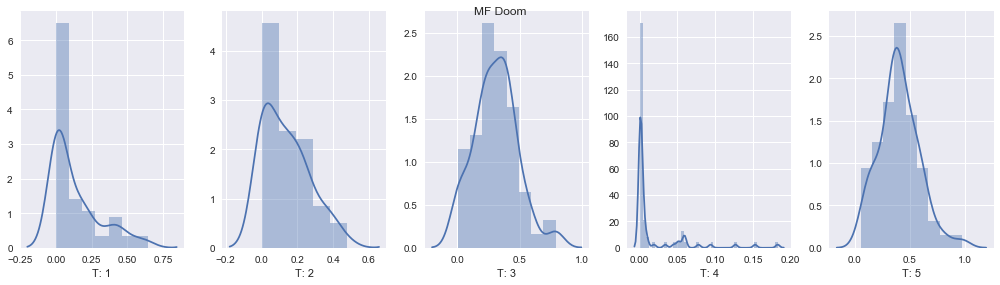

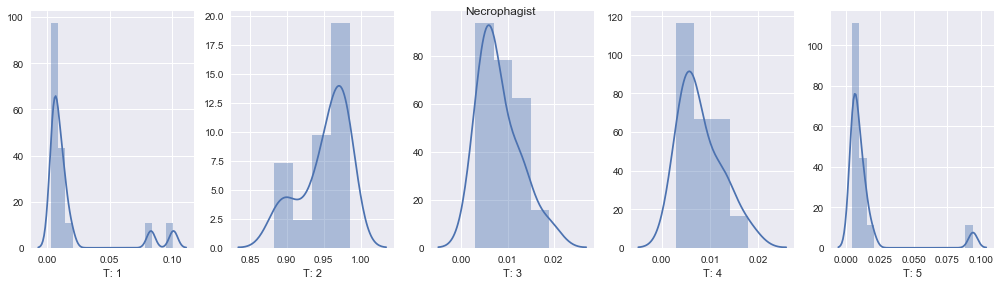

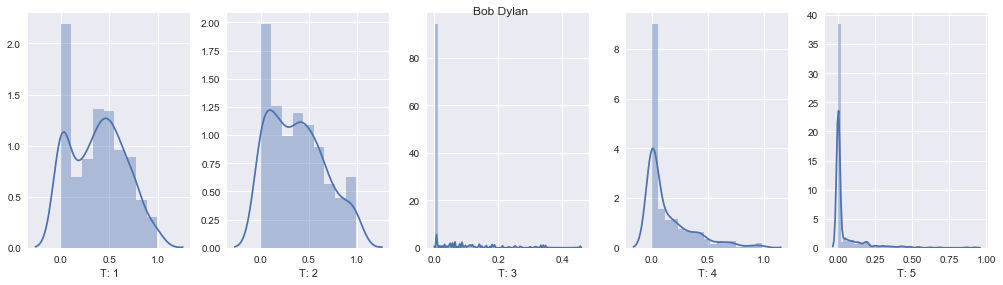

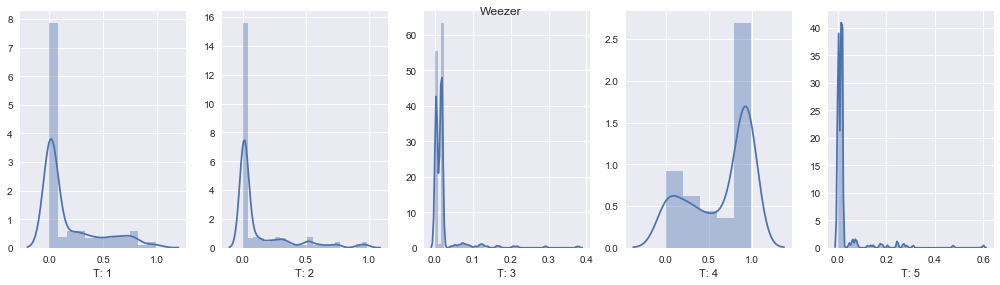

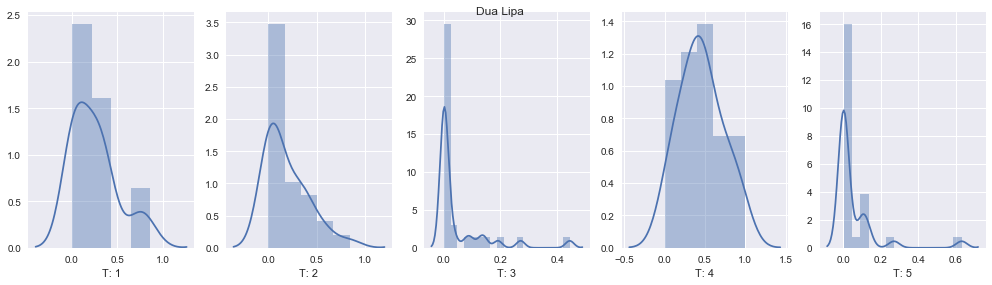

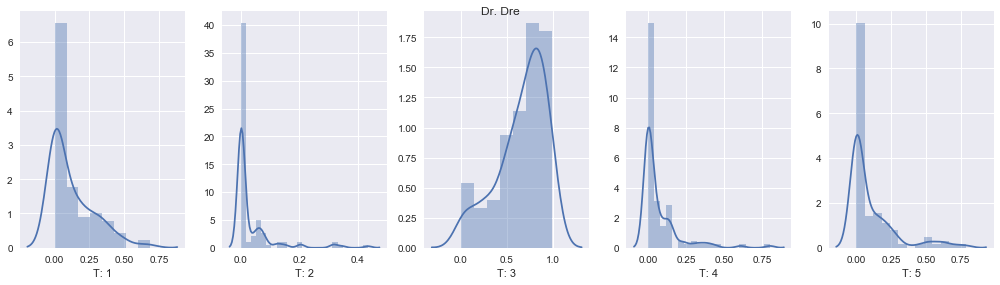

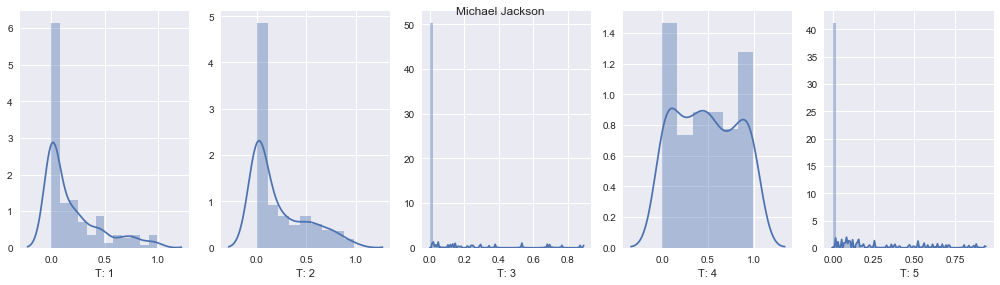

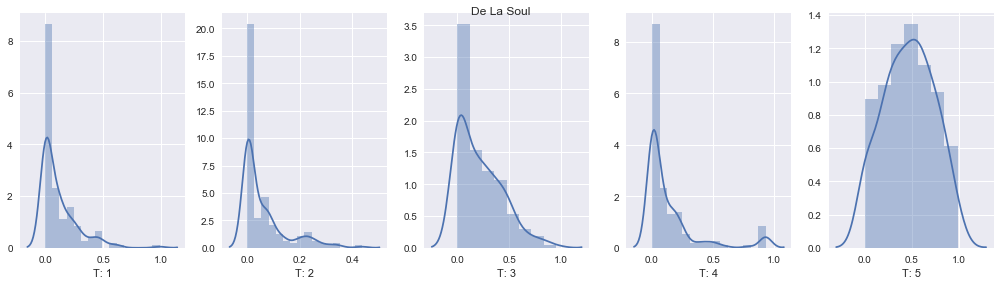

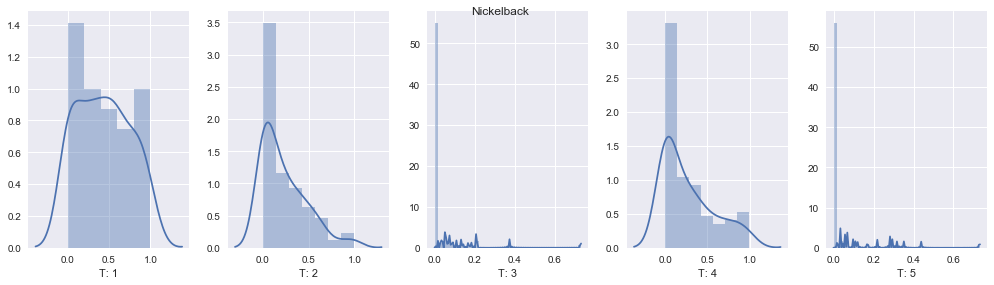

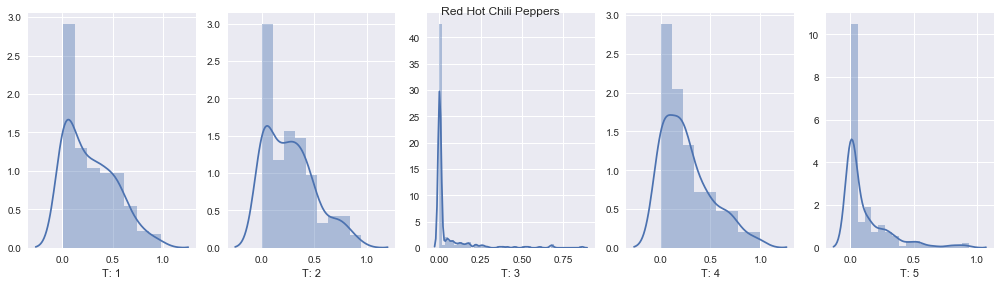

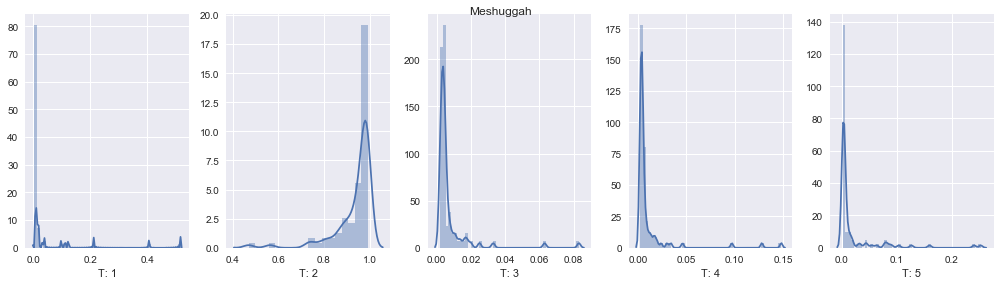

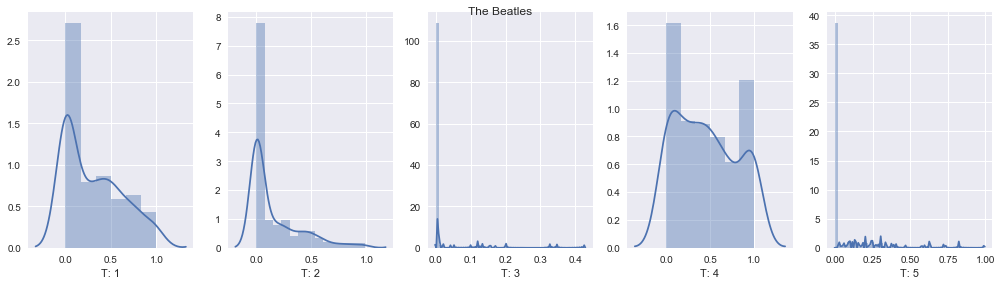

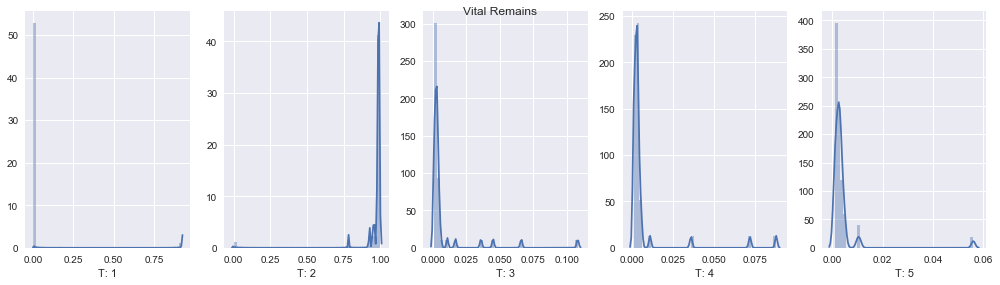

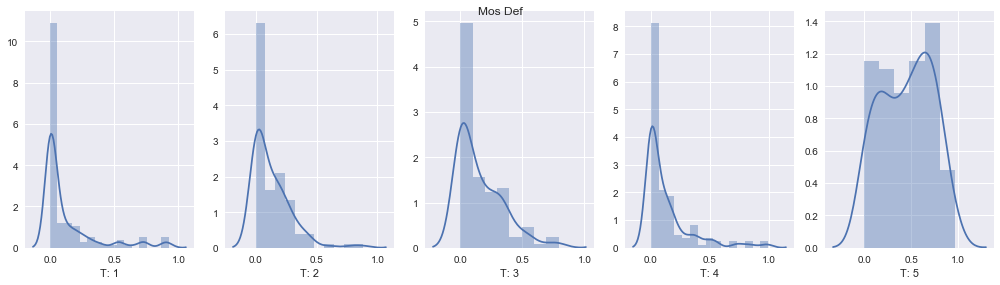

In [25]:
for x in concatenated_df['artist'].unique():
    topic_view(concatenated_df,x)
    

Conociendo de antemano los generos reproducidos por los artistas, se observa una correcta asociación en la mayoría de los casos aunque tool por ejemplo tiende a ser un poco mas ambigüo dado el mismo genro